<a href="https://colab.research.google.com/github/kdChen07/Financial_Engineering/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
from google.colab import files

添加参数

In [2]:
BDI=pd.read_excel("BDI.xlsx")
BDI

,日期,BDI,LNBDI,DLNBDI
0,2021-03-30,2103,7.651120,-0.027478
1,2021-03-31,2046,7.623642,0.012628
2,2021-04-01,2072,7.636270,0.009606
3,2021-04-06,2092,7.645876,0.016592
4,2021-04-07,2127,7.662468,-0.018506
...,...,...,...,...
245,2022-03-23,2575,7.853605,-0.003112
246,2022-03-24,2567,7.850493,-0.009000
247,2022-03-25,2544,7.841493,-0.023867
248,2022-03-28,2484,7.817625,-0.027343


In [3]:
t_delta=1/250
t_delta

0.004

In [4]:
ST=BDI["BDI"]
r=BDI["DLNBDI"]

In [5]:
sigma=np.zeros((10000,249))
sigma

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
for j in range(0,10000):
  Epsilon = np.random.normal(0, 1, 250)
  for i in range(0,249):
  # for t in range(1,N2):
   sigma[j,i]=(ST[i+1]-ST[i])/(ST[i]*Epsilon[i]*math.sqrt(t_delta))-(r[i]*t_delta)/(Epsilon[i]*math.sqrt(t_delta))


In [7]:
sigma

array([[ 0.86966632,  0.12812982, -0.12191301, ...,  0.21135617,
         0.29434299, -0.44528471],
       [-0.87992848,  0.77516046,  1.41767929, ...,  0.9097002 ,
        -0.9885803 , -1.2679927 ],
       [-0.29505985, -0.09049312,  0.06562626, ..., -0.08973957,
         0.60242081, -0.95674994],
       ...,
       [ 0.39025126,  2.85929902,  0.39640505, ..., -0.07653101,
         1.14762619,  0.39563649],
       [-0.41684963, -0.23998443, -0.1229341 , ...,  0.16118397,
         0.22083925,  0.33076713],
       [-0.72437935,  0.33637835,  0.0699876 , ..., -0.04939448,
        17.25566866, -0.36338873]])

In [32]:
data=pd.DataFrame(sigma[:,0])

In [34]:
data.to_csv("a.csv")
files.download("a.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
len(sigma[1])

249

In [9]:
x = np.arange(0,249,1)
y = sigma

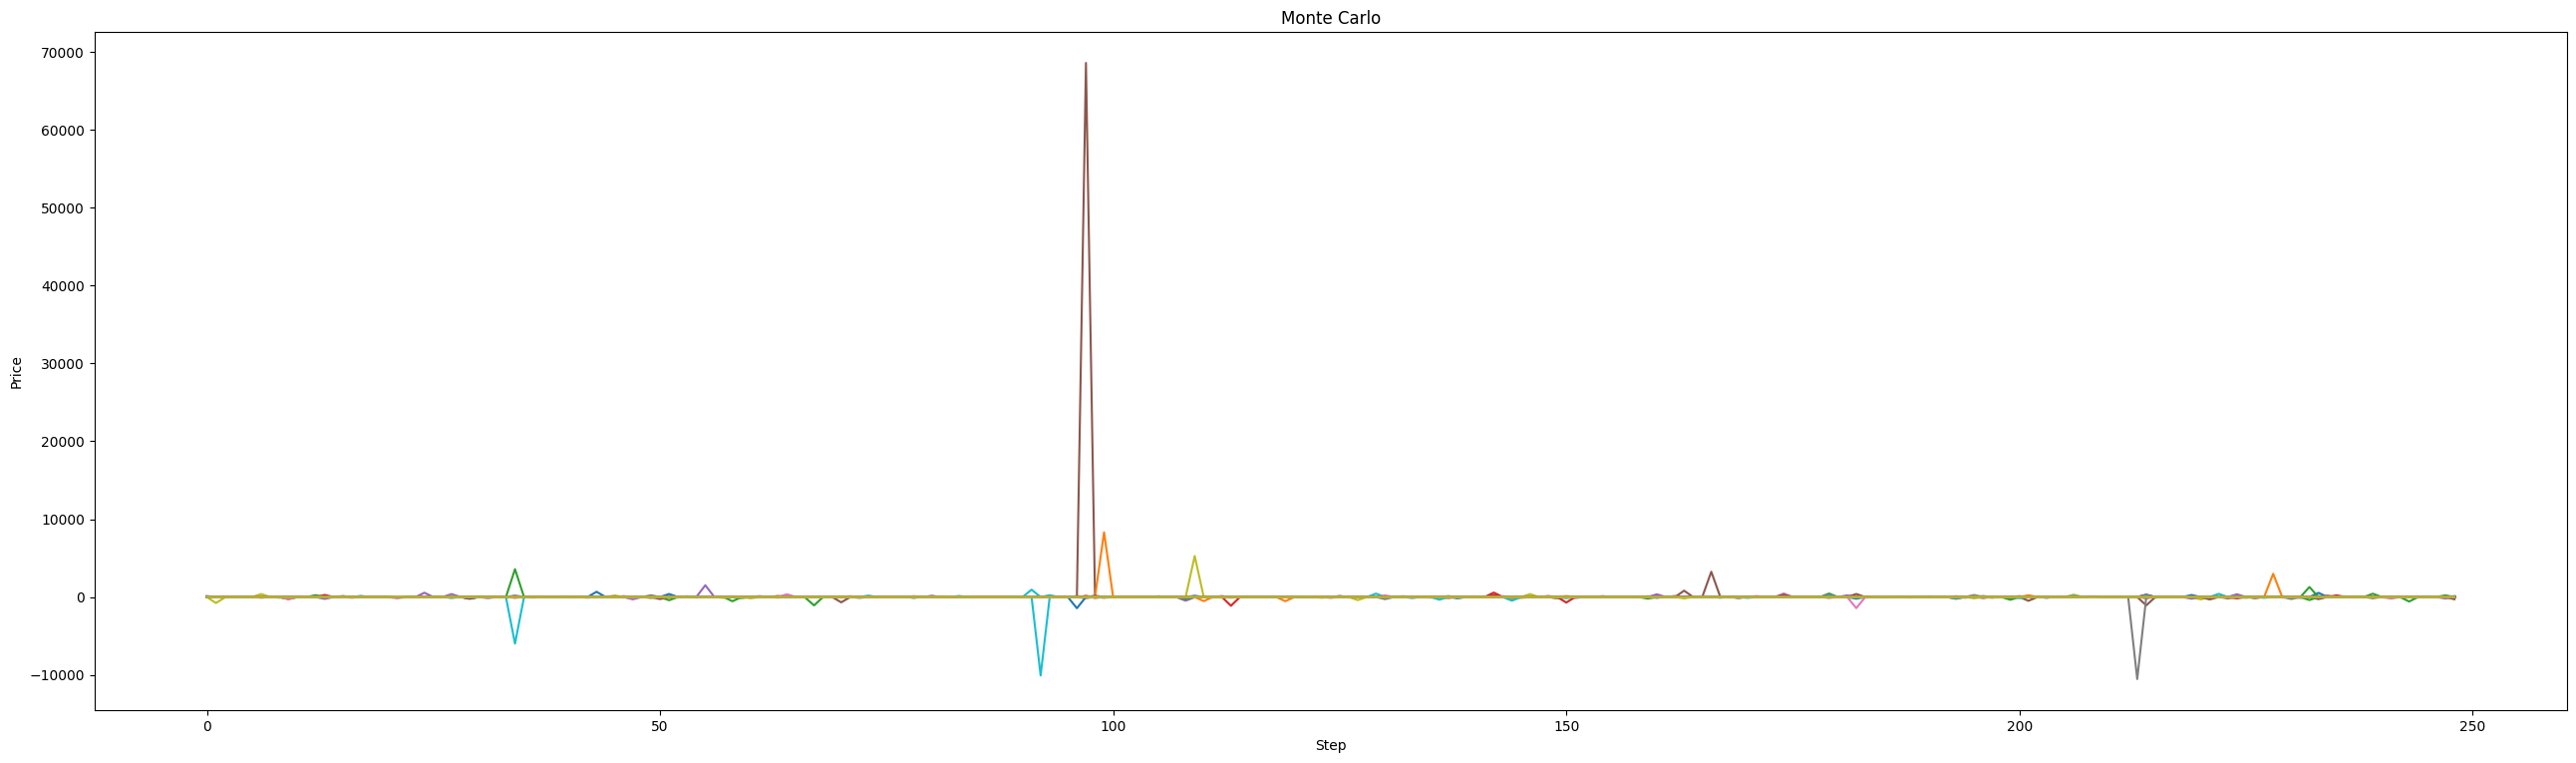

In [15]:
plt.subplots(figsize=(32,9),dpi=100)
for i in range(0,249):
  plt.plot(x, y[i,:])
  plt.title('Monte Carlo')
  plt.xlabel('Step')
  plt.ylabel('Price')

In [16]:
SIGMA=np.zeros(249)
for i in range(0,249):
  for j in range(0,10000):
    SIGMA[i]=SIGMA[i]+sigma[j,i]


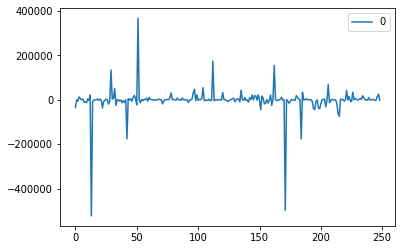

In [17]:
SIGMA_df=pd.DataFrame(SIGMA)
SIGMA_df.plot()

In [19]:
SIGMA_df

,0
0,-35146.283384
1,166.901683
2,-6444.579833
3,12968.062513
4,5720.769912
...,...
244,-2872.058373
245,-558.143412
246,15000.066139
247,25251.768644


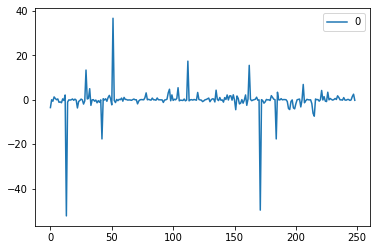

In [18]:
a=SIGMA_df/10000
a.plot()

In [37]:
suiji=pd.DataFrame(Epsilon)

In [44]:
suiji.to_csv("csv.csv")
files.download("csv.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>